In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/MOOCs/Data Analysis with Python/Chapter_6

/content/gdrive/MyDrive/Colab Notebooks/MOOCs/Data Analysis with Python/Chapter_6


# **Chapter 6**


## Topic 6.1
The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis.

The fundamental goal of data science is to use data to answer questions and guide decision making.

As an example, we'll start with a simple question: what is the average birth weight of babies in the United States?

To answer a question like this, we have to find an appropriate dataset or run an experiment to collect it. Then we have to get the data into our development environment and prepare it for analysis, which involves cleaning and validation.

For this question we'll use data from the National Survey of Family Growth, which is available from the National Center for Health Statistics.

Their 2013-2015 dataset includes information about a sample of women in the U.S. and their children.

The Python library we'll use to read and analyze data is Pandas, which we'll import as pd.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read hdf5 file
nsfg = pd.read_hdf('nsfg.hdf5')
for key in nsfg.keys():
    print(key)
# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

caseid
outcome
birthwgt_lb1
birthwgt_oz1
prglngth
nbrnaliv
agecon
agepreg
hpagelb
wgt2013_2015


In [ ]:
# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [ ]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [ ]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [ ]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [ ]:
nsfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6485 non-null   float64
 3   birthwgt_oz1  6391 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6485 non-null   float64
 9   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 804.2 KB


In [ ]:
print('Value counts:\n',nsfg['nbrnaliv'].value_counts())

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

# Print the values and their frequencies
print('Value counts:\n',nsfg['nbrnaliv'].value_counts())

Value counts:
 1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64
Value counts:
 1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [ ]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [ ]:
# Select the columns ['agecon','agepreg'] and divide by 100
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100

In [ ]:
# Compute the difference of agecon from agepreg  
preg_length = agepreg - agecon 

In [ ]:
# Compute summary statistics
print('Summary statistics:\n',preg_length.describe())

Summary statistics:
 count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


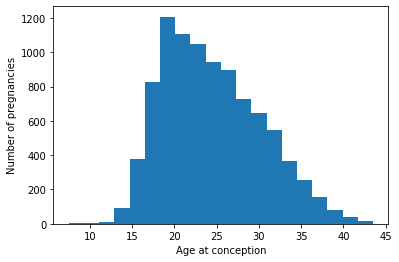

In [ ]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

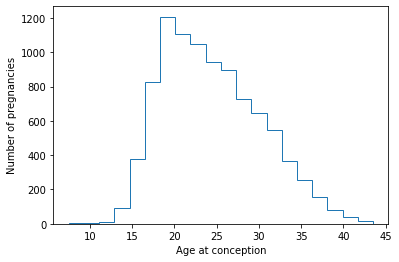

In [ ]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype = 'step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [ ]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [ ]:
# Create a Boolean Series for full-term babies
preterm = nsfg['prglngth'] <37

preterm

0       False
1        True
2        True
3        True
4       False
        ...  
9353     True
9354    False
9355     True
9356    False
9357    False
Name: prglngth, Length: 9358, dtype: bool

In [ ]:
preterm.mean()

0.39987176747168196

In [ ]:
live = (nsfg['outcome'] == 1)
live.mean()

0.6934173968796752

In [ ]:
live_preterm = (live & preterm)
live_preterm.mean()

0.09724300064116265

In [ ]:
# Filter single births
single = nsfg['nbrnaliv'] == 1

single.head()

0     True
1     True
2     True
3    False
4     True
Name: nbrnaliv, dtype: bool

In [ ]:
fullterm = (nsfg['prglngth'] >= 37)


In [ ]:
live_fullterm = (live & fullterm)
live_fullterm.mean()

0.5961743962385125

In [ ]:
ounces = nsfg['birthwgt_oz1']
pounds = nsfg['birthwgt_lb1']

pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [ ]:
ounces.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64

In [ ]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [ ]:
pounds_clean = pounds.replace([98], np.nan)
ounces_clean = ounces.replace([98], np.nan)

birth_weight = pounds_clean + ounces_clean / 16
birth_weight.mean()

7.153266823161189

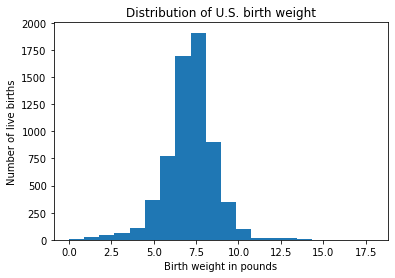

In [ ]:
plt.hist(birth_weight.dropna(), bins=20)

plt.xlabel('Birth weight in pounds')
plt.ylabel('Number of live births')
plt.title('Distribution of U.S. birth weight');

In [ ]:
n = len(nsfg)
weights = nsfg['wgt2013_2015']
sample = nsfg.sample(n, 
                     replace=True, 
                     weights=weights)

In [ ]:
sample.shape

(9358, 10)

# **Chapter 6**



## Topic 6.2

You'll learn how to represent distributions using Probability distributions.

In [ ]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
# Read hdf5
gss = pd.read_hdf('gss.hdf5', 'gss')

# Select head
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

In [ ]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


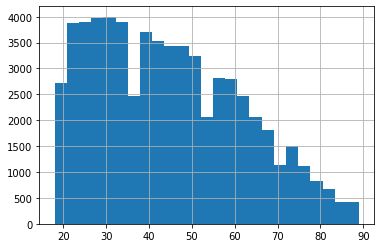

In [ ]:
# Histogram of age column
gss['age'].hist(bins=25)

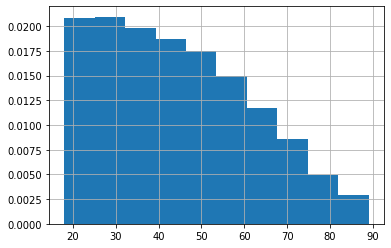

In [ ]:
gss['age'].hist(density= True, weights= None, cumulative= False, bottom= None, histtype= 'bar')

In [ ]:
# Select columns
columns = ['age', 'year', 'educ']
subset = gss[columns]

# Compute the correlation matrix
c=subset.corr()
print('Correlation of selected columns:\n',c)
c.style.background_gradient(cmap='coolwarm').set_precision(2)

Correlation of selected columns:
            age      year      educ
age   1.000000  0.065482 -0.153742
year  0.065482  1.000000  0.214065
educ -0.153742  0.214065  1.000000


,age,year,educ
age,1.00,0.07,-0.15
year,0.07,1.00,0.21
educ,-0.15,0.21,1.00


In [ ]:
# Age column
age = gss[['age']]

# Year column
year = gss[['year']]

### **KDE**
In statistics, kernel density estimation (KDE) is a non-parametric way 
to estimate the probability density function (PDF) of a random variable. 
This function uses Gaussian kernels and includes automatic bandwidth determination.

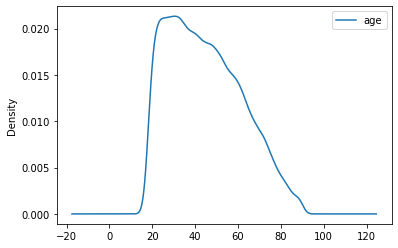

In [ ]:
# Plotting KDE of age column
age.plot.kde()
plt.show()

The method used to calculate the estimator bandwidth. This can be ‘scott’,
 ‘silverman’, a scalar constant or a callable. If None (default), ‘scott’ is used.

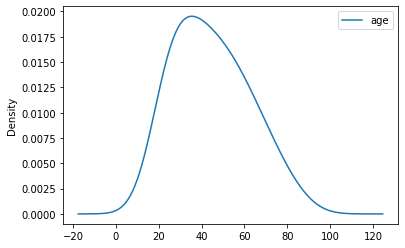

In [ ]:
age.plot.kde(bw_method=0.5)
plt.show()

In [ ]:
age = gss[['age']]

In [ ]:
# Histogram of age and year
plt.hist(age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [ ]:
year= gss['year']

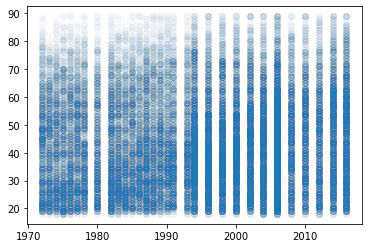

In [ ]:
# Make a scatter plot
plt.plot(year, age, 'o', alpha=0.01)
plt.show()

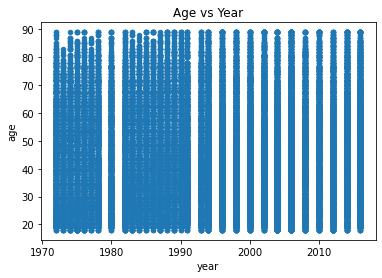

In [ ]:
# Show the scatter plot after some modifications
gss.plot(x= 'year', y= 'age', kind= 'scatter', title= 'Age vs Year')
plt.show()

###Histogram

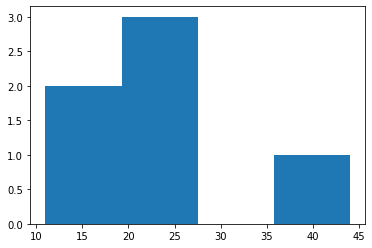

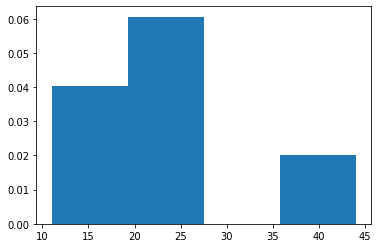

In [ ]:
age=[20,12,11,44,21,25]

# 44-11= ans/binn = 3

# 11-14, 15-17


plt.hist(age, bins=4)
plt.show()

#density
#probability density = row count/(toal count * bin width)
# 3/(6 * (11-44/4))
plt.hist(age, bins=4, density= True)
plt.show()


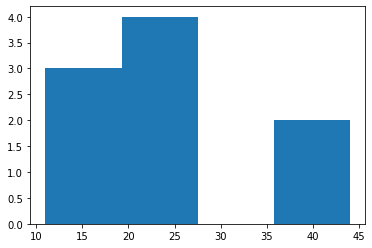

In [ ]:
#weight
age=[20,12,11,44,21,25]
plt.hist(age, bins=4, weights= [1,2,1,2,1,2])
plt.show()

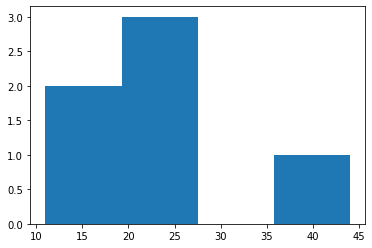

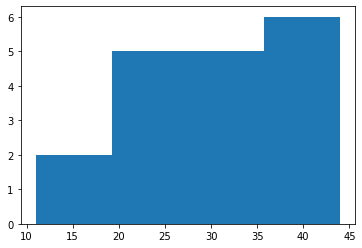

In [ ]:
#cumulative
age=[20,12,11,44,21,25]
plt.hist(age, bins=4, )
plt.show()
plt.hist(age, bins=4, cumulative=True)
plt.show()

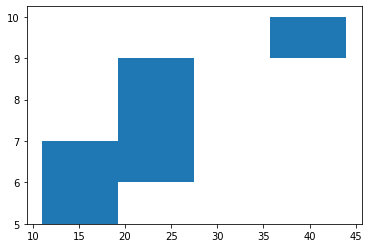

In [ ]:
#bottom
age=[20,12,11,44,21,25]
plt.hist(age, bins=4, bottom=[5,6,7,9])
plt.show()

# **Chapter 6**

## Topic 6.3

Explore multivariate relationships using multiple regression to 
describe non-linear relationships and logistic regression to explain 
and predict binary variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Read hdf5
brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Select head
display('Head of data:\n',brfss.head())

print('-' * 100)

# Show columns
print('Columns of file:\n',brfss.columns)

'Head of data:\n'

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


----------------------------------------------------------------------------------------------------
Columns of file:
 Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')


In [ ]:
brfss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 96230 to 379327
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEX       99938 non-null   float64
 1   HTM4      95143 non-null   float64
 2   WTKG3     93404 non-null   float64
 3   INCOME2   83447 non-null   float64
 4   _LLCPWT   100000 non-null  float64
 5   _AGEG5YR  98794 non-null   float64
 6   _VEGESU1  87713 non-null   float64
 7   _HTMG10   95143 non-null   float64
 8   AGE       98794 non-null   float64
dtypes: float64(9)
memory usage: 7.6 MB


In [ ]:
# Sum of all null values
brfss.isnull().sum()

SEX            62
HTM4         4857
WTKG3        6596
INCOME2     16553
_LLCPWT         0
_AGEG5YR     1206
_VEGESU1    12287
_HTMG10      4857
AGE          1206
dtype: int64

In [ ]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Drop null vlaues in required columns
subset = brfss.dropna(subset=['INCOME2','_VEGESU1'])

# Independent variable
xs = subset['INCOME2']

# Dependent variable
ys = subset['_VEGESU1']

# Run regression with linregress
res = linregress(xs, ys)
print('Linear Regression using Scipy:\n',res, '\n','-'*70) 

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print('Linear regression using Stats model:\n',results.params)

Linear Regression using Scipy:
 LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332) 
 ----------------------------------------------------------------------
Linear regression using Stats model:
 Intercept    1.528779
INCOME2      0.069880
dtype: float64


In [ ]:
res = linregress(brfss['INCOME2'], brfss['_VEGESU1'])
res

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

In [ ]:
subset.isnull().sum()

SEX           33
HTM4        1158
WTKG3       2171
INCOME2        0
_LLCPWT        0
_AGEG5YR     441
_VEGESU1       0
_HTMG10     1158
AGE          441
dtype: int64

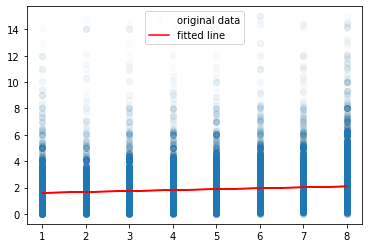

In [ ]:
plt.plot(xs, ys, 'o', label='original data',alpha=0.02)
plt.plot(xs, res.intercept + res.slope*xs,'r', label='fitted line')
plt.legend()
plt.show()

educ
0.0     15290.635124
1.0     13347.171875
2.0     25174.645592
3.0     12203.863350
4.0     14038.376914
5.0     16599.309871
6.0     14480.535269
7.0     17219.840438
8.0     18591.974047
9.0     19304.799414
10.0    22274.634658
11.0    24559.914503
12.0    30265.888455
13.0    33526.841312
14.0    36918.908456
15.0    37683.367151
16.0    49576.572500
17.0    51157.571004
18.0    57480.893192
19.0    58796.273113
20.0    64833.451064
Name: realinc, dtype: float64


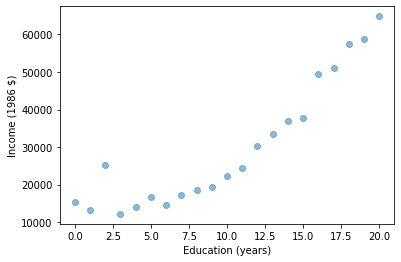

In [ ]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income of each group with respect to 'realinc' 
mean_income_by_educ = grouped['realinc'].mean()
print(mean_income_by_educ)

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5, )

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [ ]:
# Columns in gss
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf

# Add new columns named as educ squared and age squared
gss['educ2'] = gss['educ'] ** 2
gss['age2'] = gss['age']**2

# Run a regression model (Multi-linear regression) with educ, educ2, age and age2
results= smf.ols('realinc ~ educ + educ2 + age +age2', data = gss).fit()
print(results.summary())
# Print the estimated parameters
print('Intercept and Coefficients of Multi-linear regression model:\n',results.params)

                            OLS Regression Results                            
Dep. Variable:                realinc   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     2792.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:58:38   Log-Likelihood:            -6.4520e+05
No. Observations:               55345   AIC:                         1.290e+06
Df Residuals:                   55340   BIC:                         1.290e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.324e+04   1501.499    -15.479      0.0

In [ ]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2 ', data = gss).fit()

# Make the DataFrame for predictions
df = pd.DataFrame()
df['educ'] = np.linspace(start=0, stop=20)
df['age'] = 30
df['educ2'] = df['educ'] ** 2
df['age2'] = df['age'] ** 2
print(df.shape)
display(df.head())

# Generate the predictions
pred= results.predict(df)
print('-'* 70,'\nPredictions on the dataframe:\n',pred.head())

(50, 4)


,educ,age,educ2,age2
0,0.000000,30,0.000000,900
1,0.408163,30,0.166597,900
2,0.816327,30,0.666389,900
3,1.224490,30,1.499375,900
4,1.632653,30,2.665556,900


---------------------------------------------------------------------- 
Predictions on the dataframe:
 0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


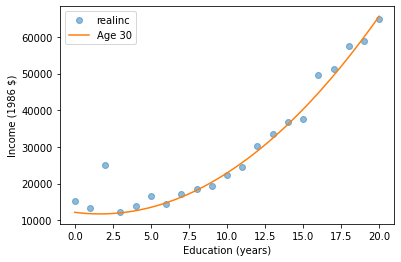

In [ ]:
# Plot mean income in each Educ group (Similar to above)
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha = 0.5, label = 'realinc')

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'],pred, label = 'Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [ ]:
results= smf.ols('realinc ~ educ', data = gss).fit()

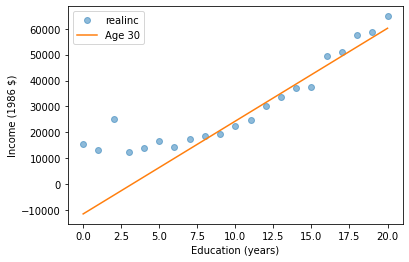

In [ ]:
# Plot mean income in each Educ group (Similar to above)
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha = 0.5, label = 'realinc')

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'],pred, label = 'Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [ ]:
gss['grass'].unique()

array([nan,  0.,  1.])

In [ ]:
# Recode grass
gss['grass'].replace(2, 0 , inplace = True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
print(results.params )
print(results.predict(gss))

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6
Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64
0        0.546216
1        0.259045
2        0.272744
3        0.233856
4        0.267804
           ...   
62461    0.396397
62462    0.270376
62463    0.204652
62464    0.203371
62465    0.205502
Length: 62466, dtype: float64


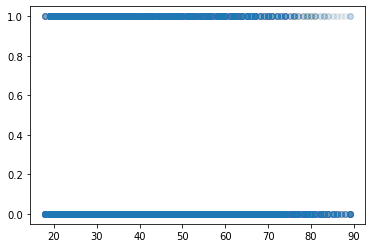

In [ ]:
plt.plot (gss['age'],gss['grass'], 'o', alpha=0.01)
plt.show()

https://www.statsmodels.org/dev/example_formulas.html